In [1]:
# import modules
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress #AMD added
import seaborn as sns #AMD added
from scipy import stats #AMD added

In [2]:
# read csv file
file_path1 = os.path.join('HUD_Cities_Data.csv')
file_path2 = os.path.join('zillow_data','18_zillow_selected_cities_mean.csv')
file_path3 = os.path.join('HUD_Consol_Data.csv')
# place csv data into a DataFrame
hud_city_df = pd.read_csv(file_path1)
zillow_df = pd.read_csv(file_path2)
hud_consol_df = pd.read_csv(file_path3)

In [3]:
hud_consol_df.head()

,Year,CityState,State,County,Total Homeless,Sheltered Homeless,Unsheltered Homeless,Homeless Individuals,Sheltered Homeless Individuals,Unsheltered Homeless Individuals,Homeless People in Families,Sheltered Homeless People in Families,Unsheltered Homeless People in Families,Chronically Homeless Individuals,Sheltered Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals
0,2017,"Anchorage, AK",AK,Anchorage,1128,973,155,848,693,155,280,280,0,114,70,44
1,2017,"Alaska, AK",AK,Alaska,717,578,139,506,367,139,211,211,0,102,47,55
2,2017,"Birmingham, AL",AL,Birmingham,1092,875,217,932,715,217,160,160,0,89,28,61
3,2017,"Mobile, AL",AL,Mobile,606,341,265,426,179,247,180,162,18,65,9,56
4,2017,"Florence, AL",AL,Florence,155,133,22,155,133,22,0,0,0,24,10,14


In [4]:
# group data by year
hud_consol_df["Total Homeless"] = pd.to_numeric(hud_consol_df["Total Homeless"], errors='coerce')
hud_consolgroup_data = hud_consol_df.groupby("Year")["Total Homeless"].sum()
hud_consolgroup_data

Year
2007    647258.0
2008    639784.0
2009    630227.0
2010    637077.0
2011    623788.0
2012    621553.0
2013    590364.0
2014    576450.0
2015    564708.0
2016    549928.0
2017    553742.0
Name: Total Homeless, dtype: float64

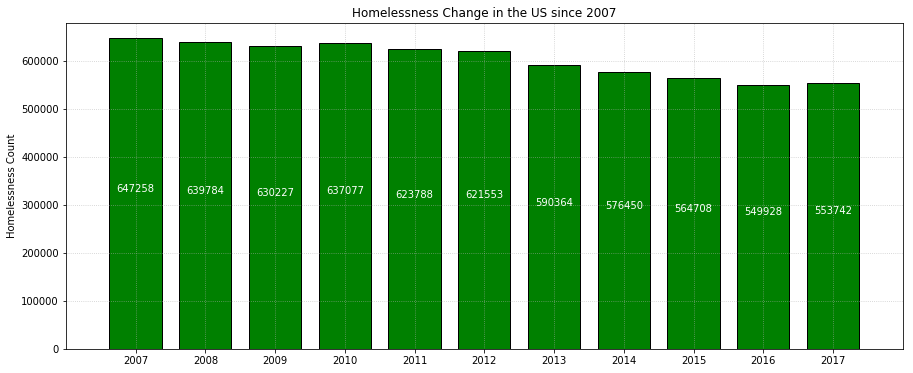

In [5]:
# Homelessness Change in the US since 2007
# Set values for X, Y axis and bar width
fig = plt.figure(figsize=(15,6))
x = hud_consolgroup_data.index
y = hud_consolgroup_data
bar_width = 0.75
edgecolor = 'black'

# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color="g", ec=edgecolor, lw=1)

# Set Graph Properties
plt.ylabel('Homelessness Count')
plt.title('Homelessness Change in the US since 2007') 
plt.grid(True,linestyle=':', alpha=0.7)
plt.xlim(2006, x.max()+1)
plt.xticks(x, hud_consolgroup_data.index)

# Set the bar value inside each bar
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 0.5*height,
                '%s' % (str(int(height))),
                ha='center', va='bottom', color="white")
# Save the figure
plt.savefig("Homelessness_Summary.png")

# Show graph
plt.show()

In [6]:
hud_state_group = hud_consol_df.groupby(["State"])["Total Homeless"].sum()
hud_state_group.sort_values(ascending=False).head()

State
CA    1368563.0
NY     805535.0
FL     514287.0
TX     351281.0
WA     229496.0
Name: Total Homeless, dtype: float64

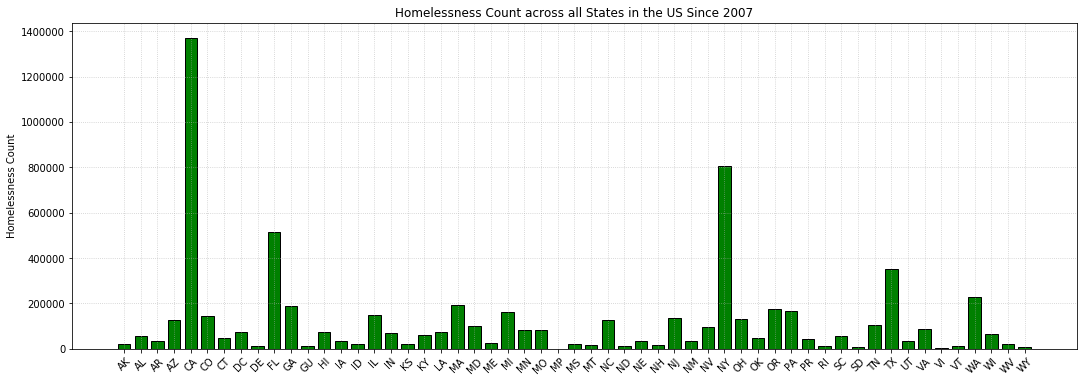

In [7]:
# Homelessness Count across all States in the US since 2007
# Set values for X, Y axis and bar width
fig = plt.figure(figsize=(18,6))
x = hud_state_group.index
y = hud_state_group
bar_width = 0.75
edgecolor = 'black'

# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color="g", ec=edgecolor, lw=1)

# Set Graph Properties
plt.ylabel('Homelessness Count')
plt.title('Homelessness Count across all States in the US Since 2007') 
plt.grid(True,linestyle=':', alpha=0.7)
plt.xticks(x, hud_state_group.index, rotation=45)
# Save the figure
plt.savefig("Homelessness_State_Summary.png")

# Show graph
plt.show()

In [8]:
hud_change_df = hud_consol_df[hud_consol_df["Year"].isin([2007,2017])]
hud_change_group = hud_change_df.groupby(["Year","State"])["Total Homeless"].sum()
hud_df = pd.DataFrame(hud_change_group)
hud_df = hud_df.reset_index()
hud_df = hud_df.pivot(index='State', columns='Year', values='Total Homeless')
hud_df.head()

Year,2007,2017
State,,
AK,1642.0,1845.0
AL,5452.0,3793.0
AR,3836.0,2467.0
AZ,14646.0,8947.0
CA,138986.0,134278.0


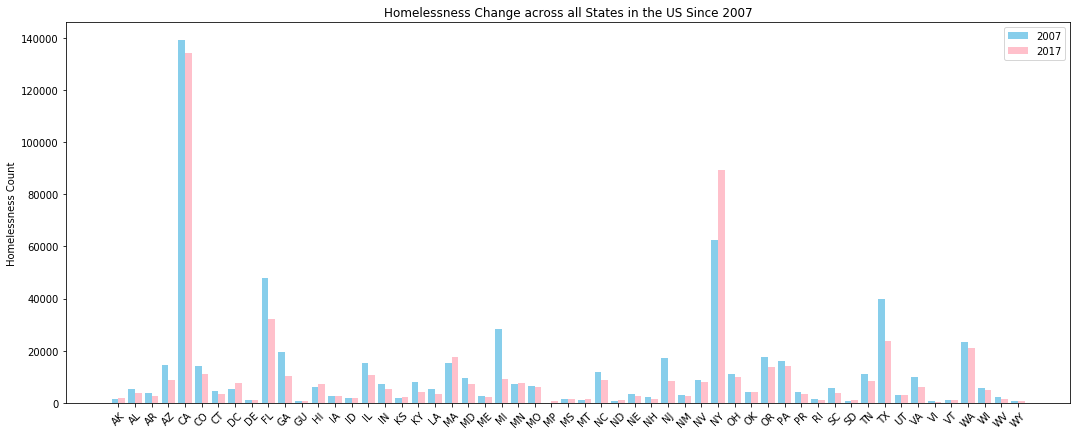

In [9]:
# Homelessness Change Summary
ind = np.arange(len(hud_df[2007]))  # the x locations for the groups
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(18,7))
rects1 = ax.bar(ind - width/2, hud_df[2007], width, color='SkyBlue', label='2007')
rects2 = ax.bar(ind + width/2, hud_df[2017], width, color='Pink', label='2017')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Homelessness Count')
ax.set_title('Homelessness Change across all States in the US Since 2007')
ax.set_xticks(ind)
ax.set_xticklabels((hud_df.index),rotation=45)
ax.legend()

# Save the figure
plt.savefig("Homelessness_Change_Summary.png")

# Show graph
plt.show()

In [10]:
hud_cities_data = hud_city_df[hud_city_df.CityState != "Washington, WA"]
hud_cities_data = hud_cities_data[[ 'Year','CityState', 'Total Homeless']]
hud_cities_data['CityStateYear'] = hud_cities_data[['CityState','Year']].apply(lambda x: ' '.join(x.astype(str)), axis=1)
hud_cities_data = hud_cities_data.set_index(['Year'])
hud_cities_data.head()

,CityState,Total Homeless,CityStateYear
Year,,,
2007,"Anchorage, AK",974,"Anchorage, AK 2007"
2008,"Anchorage, AK",1023,"Anchorage, AK 2008"
2009,"Anchorage, AK",1267,"Anchorage, AK 2009"
2010,"Anchorage, AK",1231,"Anchorage, AK 2010"
2011,"Anchorage, AK",1223,"Anchorage, AK 2011"


In [11]:
zillow_df = zillow_df.fillna(0)
zillow_df = zillow_df[['CityState','Year','ZHVIPerSqft_AllHomes', "ZHVI_AllHomes", "MedianSoldPricePerSqft_AllHomes"]]
zillow_df['Year'] = zillow_df['Year'].astype(str)
zillow_df['CityStateYear'] = zillow_df[['CityState','Year']].apply(lambda x: ' '.join(x.astype(str)), axis=1)
zillow_df.head()

,CityState,Year,ZHVIPerSqft_AllHomes,ZHVI_AllHomes,MedianSoldPricePerSqft_AllHomes,CityStateYear
0,"Anchorage, AK",2007,201.333333,300758.333333,0.0,"Anchorage, AK 2007"
1,"Anchorage, AK",2008,199.500000,296191.666667,0.0,"Anchorage, AK 2008"
2,"Anchorage, AK",2009,185.416667,272291.666667,0.0,"Anchorage, AK 2009"
3,"Anchorage, AK",2010,175.333333,259766.666667,0.0,"Anchorage, AK 2010"
4,"Anchorage, AK",2011,173.500000,260233.333333,0.0,"Anchorage, AK 2011"


In [12]:
hud_zillow_df = hud_cities_data.merge(zillow_df, on='CityStateYear', how='outer')
hud_zillow_df.head()

,CityState_x,Total Homeless,CityStateYear,CityState_y,Year,ZHVIPerSqft_AllHomes,ZHVI_AllHomes,MedianSoldPricePerSqft_AllHomes
0,"Anchorage, AK",974.0,"Anchorage, AK 2007","Anchorage, AK",2007,201.333333,300758.333333,0.0
1,"Anchorage, AK",1023.0,"Anchorage, AK 2008","Anchorage, AK",2008,199.500000,296191.666667,0.0
2,"Anchorage, AK",1267.0,"Anchorage, AK 2009","Anchorage, AK",2009,185.416667,272291.666667,0.0
3,"Anchorage, AK",1231.0,"Anchorage, AK 2010","Anchorage, AK",2010,175.333333,259766.666667,0.0
4,"Anchorage, AK",1223.0,"Anchorage, AK 2011","Anchorage, AK",2011,173.500000,260233.333333,0.0


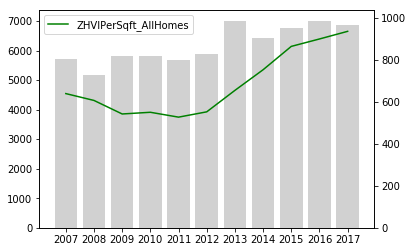

In [13]:
sfo_df = hud_zillow_df[hud_zillow_df.CityState_x == "San Francisco, CA"]

#ax = selected_new_df[['Year', 'ZHVIPerSqft_AllHomes']].plot(x='Year', linestyle='-', marker='o')
#selected_new_df[['Year', 'Total Homeless']].plot(x='Year', kind='bar', ax=ax)

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(sfo_df['Year'], sfo_df["Total Homeless"], color=(190/255,190/255,190/255,0.7), label='Total Homeless')

ax2.plot(sfo_df['Year'], sfo_df["ZHVIPerSqft_AllHomes"], color='green', label='ZHVIPerSqft_AllHomes')
plt.ylim(0, sfo_df['ZHVIPerSqft_AllHomes'].max()+100)
ax.set_xticklabels(sfo_df['Year'])

#ax.legend(loc='best')
ax2.legend(loc='best')

plt.show()

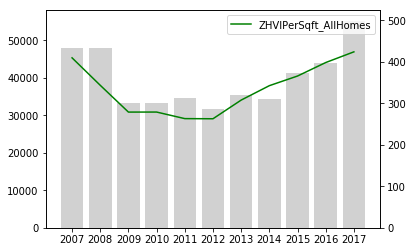

In [14]:
LA_df = hud_zillow_df[hud_zillow_df.CityState_x == "Los Angeles, CA"]

#ax = selected_new_df[['Year', 'ZHVIPerSqft_AllHomes']].plot(x='Year', linestyle='-', marker='o')
#selected_new_df[['Year', 'Total Homeless']].plot(x='Year', kind='bar', ax=ax)

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(LA_df['Year'], LA_df["Total Homeless"], color=(190/255,190/255,190/255,0.7), label='Total Homeless')

ax2.plot(LA_df['Year'], LA_df["ZHVIPerSqft_AllHomes"], color='green', label='ZHVIPerSqft_AllHomes')
plt.ylim(0, LA_df['ZHVIPerSqft_AllHomes'].max()+100)

ax.set_xticklabels(LA_df['Year'])

#ax.legend(loc='best')
ax2.legend(loc='best')

plt.show()

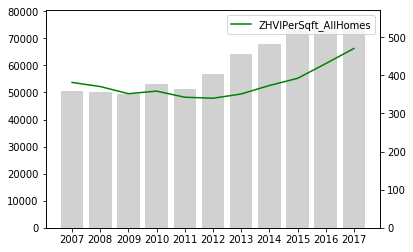

In [15]:
NY_df = hud_zillow_df[hud_zillow_df.CityState_x == "New York, NY"]

#ax = selected_new_df[['Year', 'ZHVIPerSqft_AllHomes']].plot(x='Year', linestyle='-', marker='o')
#selected_new_df[['Year', 'Total Homeless']].plot(x='Year', kind='bar', ax=ax)

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(NY_df['Year'], NY_df["Total Homeless"], color=(190/255,190/255,190/255,0.7), label='Total Homeless')

ax2.plot(NY_df['Year'], NY_df["ZHVIPerSqft_AllHomes"], color='green', label='ZHVIPerSqft_AllHomes')
plt.ylim(0, NY_df['ZHVIPerSqft_AllHomes'].max()+100)
ax.set_xticklabels(NY_df['Year'])

#ax.legend(loc='best')
ax2.legend(loc='best')

plt.show()

In [16]:
#Angela's plots
hud_zillow_df.head()

,CityState_x,Total Homeless,CityStateYear,CityState_y,Year,ZHVIPerSqft_AllHomes,ZHVI_AllHomes,MedianSoldPricePerSqft_AllHomes
0,"Anchorage, AK",974.0,"Anchorage, AK 2007","Anchorage, AK",2007,201.333333,300758.333333,0.0
1,"Anchorage, AK",1023.0,"Anchorage, AK 2008","Anchorage, AK",2008,199.500000,296191.666667,0.0
2,"Anchorage, AK",1267.0,"Anchorage, AK 2009","Anchorage, AK",2009,185.416667,272291.666667,0.0
3,"Anchorage, AK",1231.0,"Anchorage, AK 2010","Anchorage, AK",2010,175.333333,259766.666667,0.0
4,"Anchorage, AK",1223.0,"Anchorage, AK 2011","Anchorage, AK",2011,173.500000,260233.333333,0.0


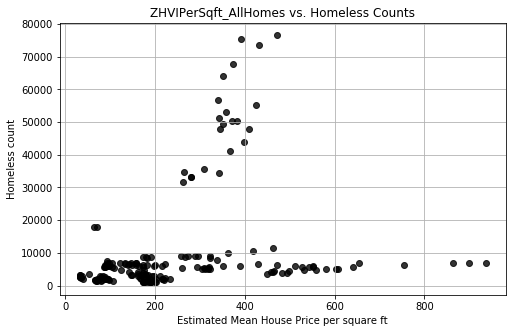

In [17]:
#Maybe move this to the top for an overview/big picture trend? WE CAN PICK ONE OF THE THREE
#Scatterplot for real estate prices vs. homeless counts for 18 major cities for data 
#collected for the past 10 years! BIG PICTURE
fig = plt.figure(figsize=(8,5)) #Jagatha Added
plt.scatter(hud_zillow_df["ZHVIPerSqft_AllHomes"], 
            hud_zillow_df["Total Homeless"],
            color="black", marker="o", 
            alpha=0.8)
# Incorporate the other graph properties
plt.title("ZHVIPerSqft_AllHomes vs. Homeless Counts")
plt.ylabel("Homeless count")
plt.xlabel("Estimated Mean House Price per square ft") # MEAN OF THE ESTIMATED MEDIAN VALUE
plt.grid(True) #Jagatha Added
# plt.savefig("ZHVIPerSqft_AllHomes_HomelessCount.png")
plt.show()

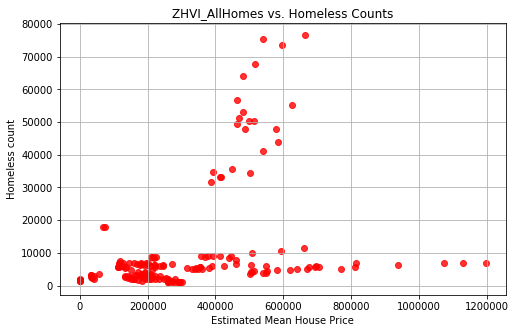

In [18]:
fig = plt.figure(figsize=(8,5)) #Jagatha Added
plt.scatter(hud_zillow_df["ZHVI_AllHomes"], 
            hud_zillow_df["Total Homeless"],
            color="red", marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("ZHVI_AllHomes vs. Homeless Counts")
plt.ylabel("Homeless count")
plt.xlabel("Estimated Mean House Price") # MEAN OF THE ESTIMATED MEDIAN VALUE
plt.grid(True) #Jagatha Added
# plt.savefig("ZHVIPerSqft_AllHomes_HomelessCount.png")
plt.show()

In [19]:
#Scatterplot ZHVIPerSqft_AllHomes data vs MedianSoldPricePerSqft_AllHomes to make 
#sure that ZHVI estimates can be used as representative of actual sales prices.
#Good linear regression. 
#ZHVI is available for all cities, without gaps (NaNs) so that's why we chose to use it,
#instead of actual sold price data.
fig = plt.figure(figsize=(8,5)) #Jagatha Added
plt.scatter(hud_zillow_df["MedianSoldPricePerSqft_AllHomes"], 
            hud_zillow_df["ZHVIPerSqft_AllHomes"],color="purple", marker="o",alpha=0.8)
            
# Incorporate the other graph properties
plt.title("MedianSoldPricePerSqft_AllHomes vs. ZHVIPerSqft_AllHomes")
plt.ylabel("ZHVIPerSqft_AllHomes")
plt.xlabel("MedianSoldPricePerSqft_AllHomes") 

#Calculate and add R2 value
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
# print("r-squared:", round(r_value**2, 4))
R= round(r_value**2, 4)

#Add regression line
sns.regplot(hud_zillow_df["MedianSoldPricePerSqft_AllHomes"], 
              hud_zillow_df["ZHVIPerSqft_AllHomes"], label = "$R^2$= " + str(R))
#ax = sns.regplot(hud_zillow_df["MedianSoldPricePerSqft_AllHomes"], 
 #                hud_zillow_df["ZHVIPerSqft_AllHomes"], ax=ax, dropna=True, label = '0.9304')
plt.legend(loc='best')
sns.set_style('whitegrid')
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
# Homeless Demographics Summary by Gender and Race
# read file
file_path4 = os.path.join('HUD_Demographics_Data.xlsx')
hud_demo_df = pd.read_excel(file_path4, sheet_name="Gender")
hud_demo_df.head()

In [ ]:
# Pie Charts - Demographics Summary by Gender - New York
# Set the labels 
labels = ["Do not Identify","Female","Male","TG"]
# by Gender
hud_demo_ny = hud_demo_df[hud_demo_df.State == 'NY']
hud_demo_ny_group = hud_demo_ny.groupby("Gender")["Total"].sum()
# Calculate Total Homeless
homeless_total = hud_demo_ny["Total"].sum()
# Calculate Percentage
homeless_percentage = round(((hud_demo_ny_group/homeless_total)*100),2)
sizes = homeless_percentage
explode = (0.1, 0 , 0, 0)  
# Plot Pie Chart
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Homeless Demographic Summary by Gender - New York")
# Show Plot
plt.show()


In [ ]:
# California
hud_demo_ca = hud_demo_df[hud_demo_df.State == 'CA']
hud_demo_ca_group = hud_demo_ca.groupby("Gender")["Total"].sum()
# Calculate Total Homeless
homeless_total = hud_demo_ca["Total"].sum()
# Calculate Percentage
homeless_percentage = round(((hud_demo_ca_group/homeless_total)*100),2)
sizes = homeless_percentage
explode = (0.1, 0 , 0, 0)  
# Plot Pie Chart
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Homeless Demographic Summary by Gender - California")
# Show Plot
plt.show()

In [ ]:
# Florida
hud_demo_fl = hud_demo_df[hud_demo_df.State == 'FL']
hud_demo_fl_group = hud_demo_fl.groupby("Gender")["Total"].sum()
# Calculate Total Homeless
homeless_total = hud_demo_fl["Total"].sum()
# Calculate Percentage
homeless_percentage = round(((hud_demo_fl_group/homeless_total)*100),2)
sizes = homeless_percentage
explode = (0.1, 0 , 0, 0)  
# Plot Pie Chart
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Homeless Demographic Summary by Gender - Florida")
# Show Plot
plt.show()

In [ ]:
# Demographic Summary by Race
hud_demo_race_df = pd.read_excel(file_path4, sheet_name="Race")
hud_demo_race_df.head()

In [ ]:
# Pie Charts - New York
# Set the labels and colors of Pie
labels = ['American Indian or Alaska Native ', 'Asian ',
       'Black or African-American ', 'Multiple Races ',
       'Native Hawaiian or Other Pacific Islander ', 'White ']

# by Race
hud_demo_ny = hud_demo_race_df[hud_demo_race_df.State == 'NY']
hud_demo_ny_group = hud_demo_ny.groupby("Race")["Total"].sum()
# Calculate Total Homeless
homeless_total = hud_demo_race_df["Total"].sum()
# Calculate Percentage
homeless_percentage = round(((hud_demo_ny_group/homeless_total)*100),2)
sizes = homeless_percentage
explode = (0.1, 0 , 0, 0,0,0)  
# Plot Pie Chart
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Homeless Demographic Summary - New York")
# Show Plot
plt.show()

In [ ]:
# California
hud_demo_ca = hud_demo_race_df[hud_demo_race_df.State == 'CA']
hud_demo_ca_group = hud_demo_ca.groupby("Race")["Total"].sum()
# Calculate Total Homeless
homeless_total = hud_demo_race_df["Total"].sum()
# Calculate Percentage
homeless_percentage = round(((hud_demo_ca_group/homeless_total)*100),2)
sizes = homeless_percentage
explode = (0.1, 0 , 0, 0,0,0)  
# Plot Pie Chart
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Homeless Demographic Summary - California")
# Show Plot
plt.show()

In [ ]:
# Florida
hud_demo_fl = hud_demo_race_df[hud_demo_race_df.State == 'FL']
hud_demo_fl_group = hud_demo_fl.groupby("Race")["Total"].sum()
# Calculate Total Homeless
homeless_total = hud_demo_race_df["Total"].sum()
# Calculate Percentage
homeless_percentage = round(((hud_demo_fl_group/homeless_total)*100),2)
sizes = homeless_percentage
explode = (0.1, 0 , 0, 0,0,0)  
# Plot Pie Chart
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Homeless Demographic Summary - Florida")
# Show Plot
plt.show()
